 GSA with feature scoring

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from ema_workbench import ema_logging, load_results
from ema_workbench.analysis import (get_ex_feature_scores,
                                    RuleInductionType)

ema_logging.log_to_stderr(level=ema_logging.INFO)
# from dicemodel.noDICE_v3 import PyDICE
# model_version = 'v4'

import os
from dest_directories import gz_path, fig_path



In [2]:
results = load_results(os.path.join(gz_path,'38_OE2000s_50p_.tar.gz'))


[MainProcess/INFO] results loaded succesfully from E:\Year_2_Quarter_4\Thesis\06_Code\results\gz_files\38_OE2000s_50p_.tar.gz


In [3]:
experiments, outcomes = results

In [4]:
experiments = experiments.drop(['model', 'policy'], axis=1)



In [5]:
TimeLine = []
for i in range(65):
    TimeLine.append(2020+i*5)
TimeLine
outcomes["TIME"] = np.array([TimeLine])
# outcomes



In [6]:
# x = numpy.delete(x, (0), axis=0)
for key, value in outcomes.items():
    outcomes[key] = value[:,2:-5]  
outcomes['Welfare'].shape


(100000, 58)

In [7]:
n_scenarios = 2000
n_policies = 50
run = '38_OE'


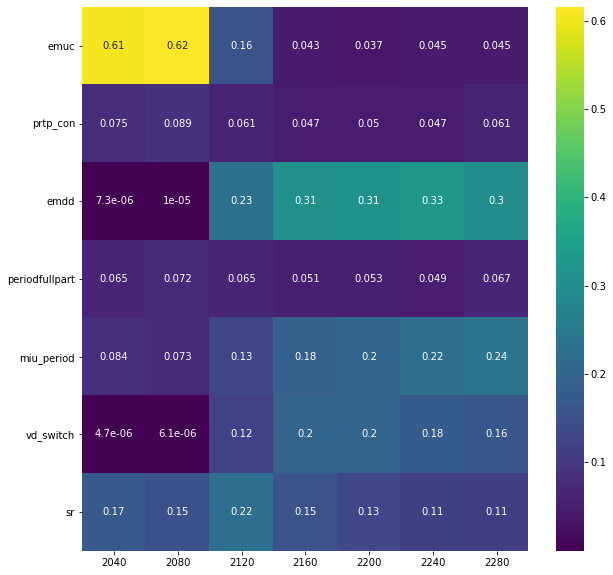

In [8]:
#  Welfare
from ema_workbench.analysis import feature_scoring

y = outcomes['Welfare']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()
# take = 3
fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_Wel' + '.png'))


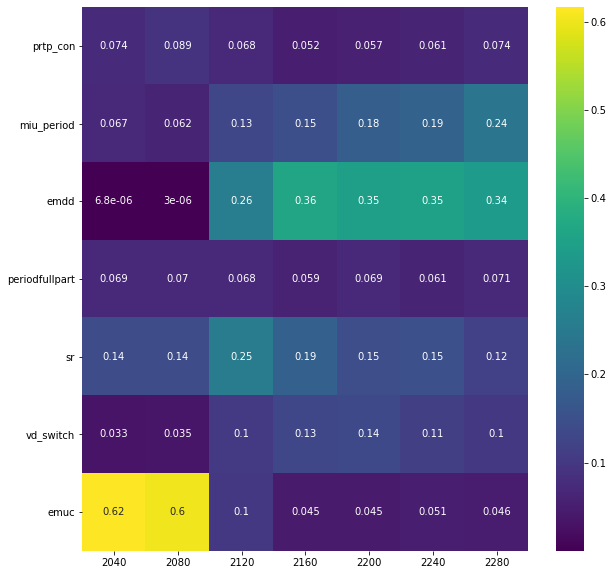

In [10]:
#  Welfare
from ema_workbench.analysis import feature_scoring

y = outcomes['Welfare']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()
# take = 3
fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_Wel' + '.png'))


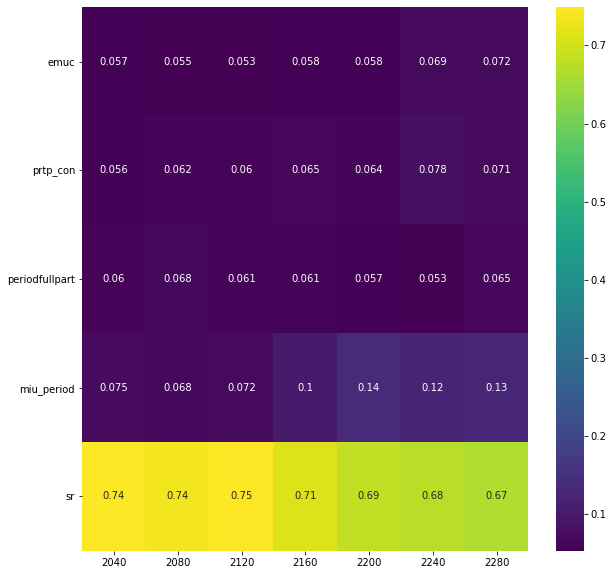

In [12]:
# Total Output
y = outcomes['Total Output']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()
fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_Output' + '.png'))


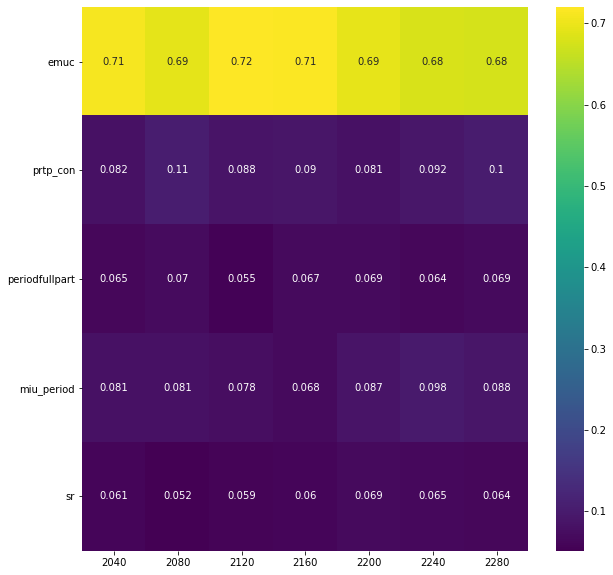

In [9]:
# del
#  Utility of Consumption
y = outcomes['Utility of Consumption']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()


# fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_UtilC' + str(n_scenarios) + 's_' + str(n_policies) + 'p_take_' + str(take) + '.png'))


In [10]:
fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_UtilC' + '.png'))

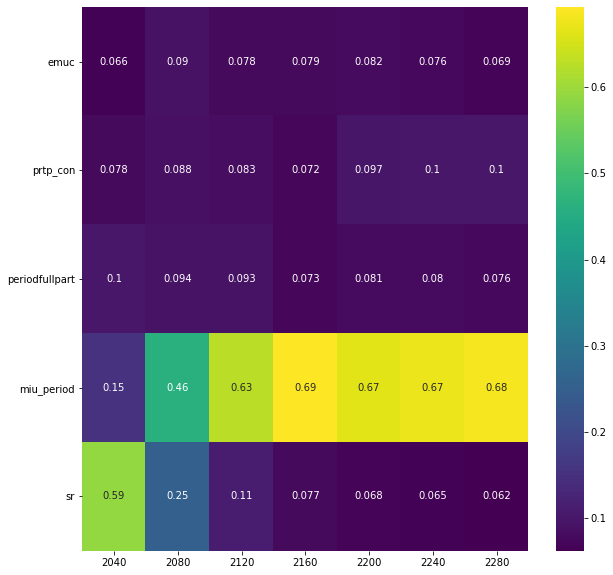

In [16]:
#  Disutility of Damage
y = outcomes['Atmospheric Temperature']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()

fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_Temp' + '.png'))


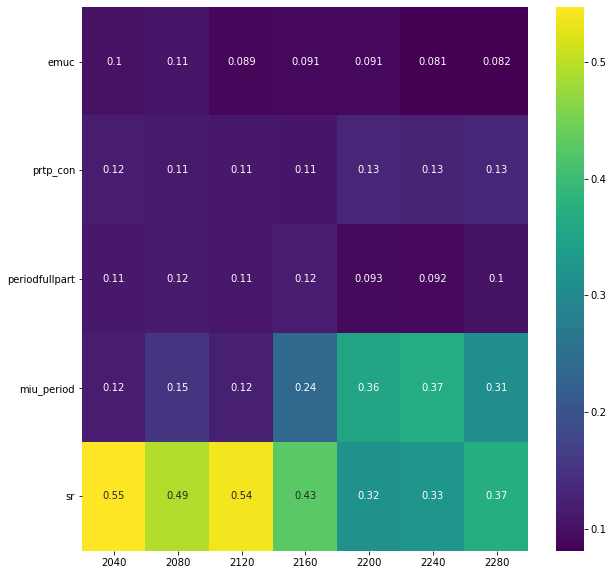

In [15]:
#  Consumption
y = outcomes['Per Capita Consumption']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()

fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_Con' + '.png'))


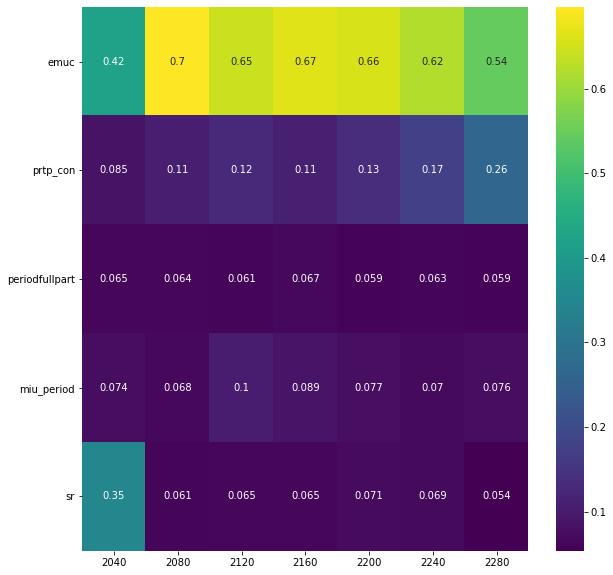

In [17]:
#  Consumption SDR
y = outcomes['Consumption SDR']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()

fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_SDR_Con' + '.png'))


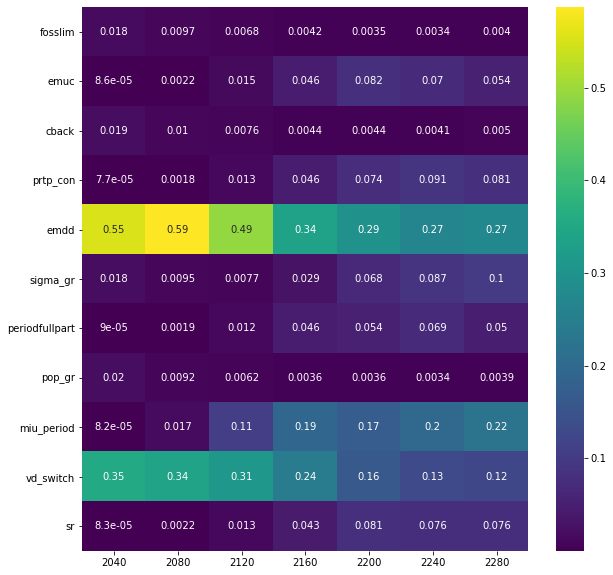

In [18]:
#  Damage SDR
y = outcomes['Damage SDR']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()

fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_SDR_Dam' + '.png'))


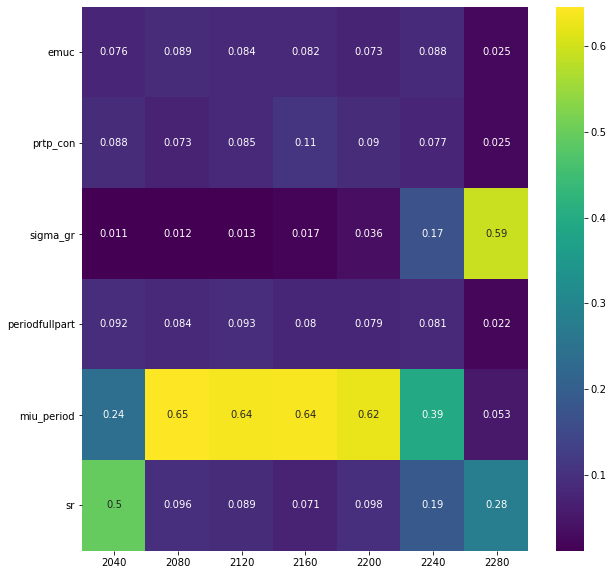

In [19]:
#  SCC
y = outcomes['SCC']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()

fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_SCC' + '.png'))


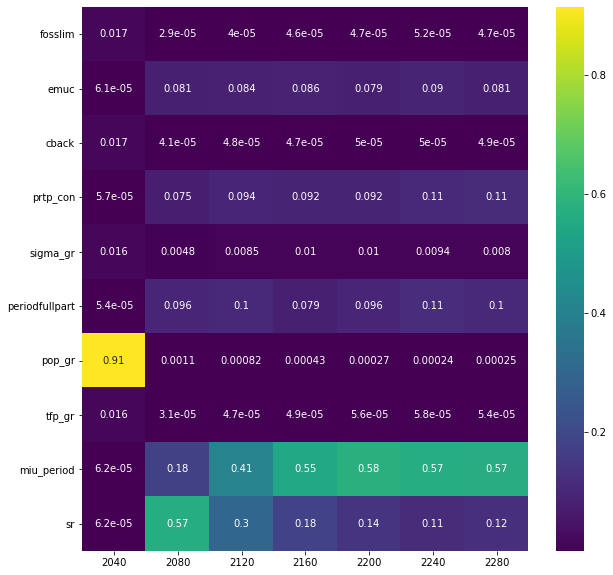

In [20]:
#  Per Capita Damage
y = outcomes['Per Capita Damage']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()

fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_Dam' + '.png'))


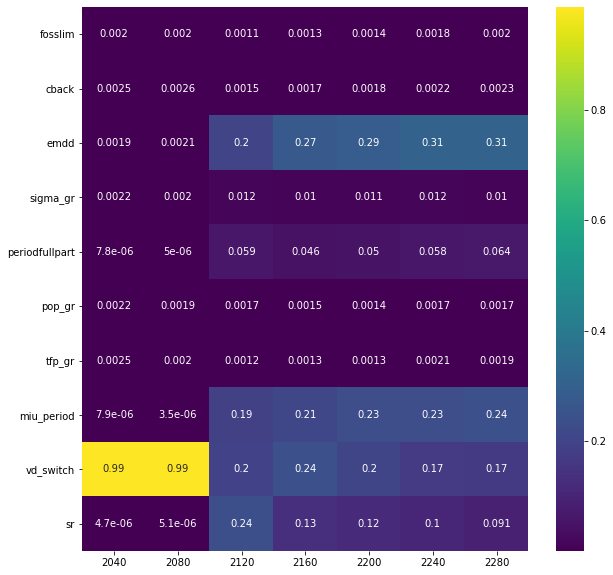

In [21]:
#  Disutility of Damage
y = outcomes['Disutility of Damage']
all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(experiments, data,
                                   mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)   
    scores = scores.rename(columns={1:outcomes['TIME'][0, i]})
    all_scores.append(scores)
    
all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap='viridis', annot=True)
fig.set_size_inches(10,10)
plt.show()

fig.savefig(os.path.join(fig_path,str(run) + '_Feature_scores_VD' + '.png'))
